# NOTES 
I selected two recordings to start as a practice to compare the performance of human astrocytes and induced HA 

NGN2+HA, and NGN2+iHA, Day21, both for dish number 3636 (is this the dish number?)

All recordings were prefiltered in MultiWell Analyzer software with the parameters given to me. 

1, Sampling Rate: 20,000 Hz

2, HighPass Filter: 2nd order BW 100 Hz, LowPass Filter: 4th order BW 3500 Hz

3, Spike Detection Threshold: 1000ms+_5sd

4, Burst Detection Rules: Max interval to start/end burst(20ms),Min interval between bursts(50ms), Min burst dur(50ms)

5, Min spike count in burst: 6

6, Network Detection Rules: Min chnl(4),Min simu chnl(3)

7, Active chnls: Min spikes/min(10), Min ampl(20microvolts)

8, Active Wells: min 3 active chnls


# 1, Import libraries and files, remove inactive channels

In [3]:
%pip install seaborn
%pip install numpy scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

file_name = 'data/dosenew.csv'
expdata = pd.read_csv(file_name)
print(expdata.shape)

#remove inactive channels
data = expdata[expdata['Active Channel'] == True]
print(data.shape)

biha = expdata[expdata['Compound ID'] == 'NGN2 + iHA']
bha = expdata[expdata['Compound ID'] == 'NGN2 + HA']
iha = data[data['Compound ID'] == 'NGN2 + iHA']
ha = data[data['Compound ID'] == 'NGN2 + HA']
print(biha.shape)
print(bha.shape)
print(iha.shape)
print(ha.shape)

print(data.dtypes) 

(96, 24)
(81, 24)
(48, 24)
(48, 24)
(37, 24)
(44, 24)
Channel ID                                 int64
Channel Label                              int64
Well ID                                    int64
Well Label                                object
Compound ID                               object
Compound Name                            float64
Experiment                                object
Dose [pM]                                  int64
Dose Label                                object
Spike Count                                int64
Spike Rate [Hz]                          float64
Burst Count                                int64
Mean Burst Duration [µs]                 float64
Mean Burst Spike Count                   float64
Mean Burst Spike Rate [Hz]               float64
Percentage Spikes in Burst               float64
Mean Interburst Interval [µs]            float64
Active Channel                              bool
Network Burst Count                        int64
Mean Network Bu

Finding: Compound HA has 4 inactive channels while Compound iHA has 11 inactive channels.

NGN2 + HA are more active. 

# 2, Some plots for initial observations

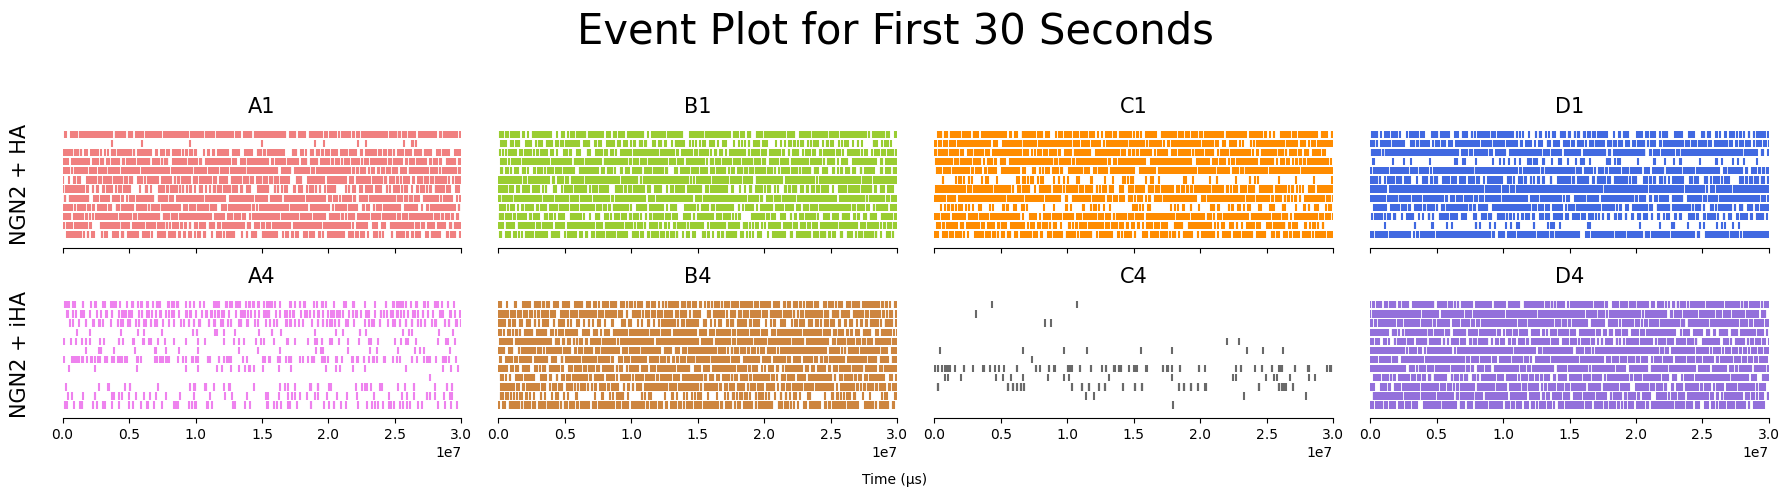

In [50]:
file_path = 'data/timenew.csv'  
spike_data = pd.read_csv(file_path)

first_row_labels = ['A1', 'B1', 'C1', 'D1']
second_row_labels = ['A4', 'B4', 'C4', 'D4']
row_labels = ['NGN2 + HA', 'NGN2 + iHA']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

colors = ['lightcoral','yellowgreen','darkorange','royalblue','violet','peru','dimgray','mediumpurple'] 

for i, well_label in enumerate(first_row_labels + second_row_labels):
    row = i // 4  # Integer division to determine the row index
    col = i % 4   # Modulus to determine the column index....just learned 
    
    well_data = spike_data[spike_data['Well Label'] == well_label]
    
    grouped_data = well_data.groupby('Channel ID')['Timestamp [µs]'].apply(list).tolist()
    
    event_data = [[timestamp for timestamp in channel_events if timestamp <= 30e6] for channel_events in grouped_data]

    axs[row, col].eventplot(event_data, colors=colors[i], linelengths=0.8)
    axs[row, col].set_title(well_label,size=15)
    axs[row, col].set_yticks([])
    axs[row, col].spines['top'].set_visible(False)
    axs[row, col].spines['right'].set_visible(False)
    axs[row, col].spines['left'].set_visible(False)
    
for ax, label in zip(axs[:, 0], row_labels):
    ax.set_ylabel(label, rotation='vertical', size=15, labelpad=20)

fig.text(0.5, 0.04, 'Time (µs)', ha='center', va='center')
fig.suptitle('Event Plot for First 30 Seconds',size=30)

# Set the x-axis limit to (in microseconds) for all plots!!!
for ax in axs.flat:
    ax.set_xlim(0, 30e6)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95]) 
plt.show()


Most channels in C4 are inactive, so Well C4 can be disgarded??

What about A4? 

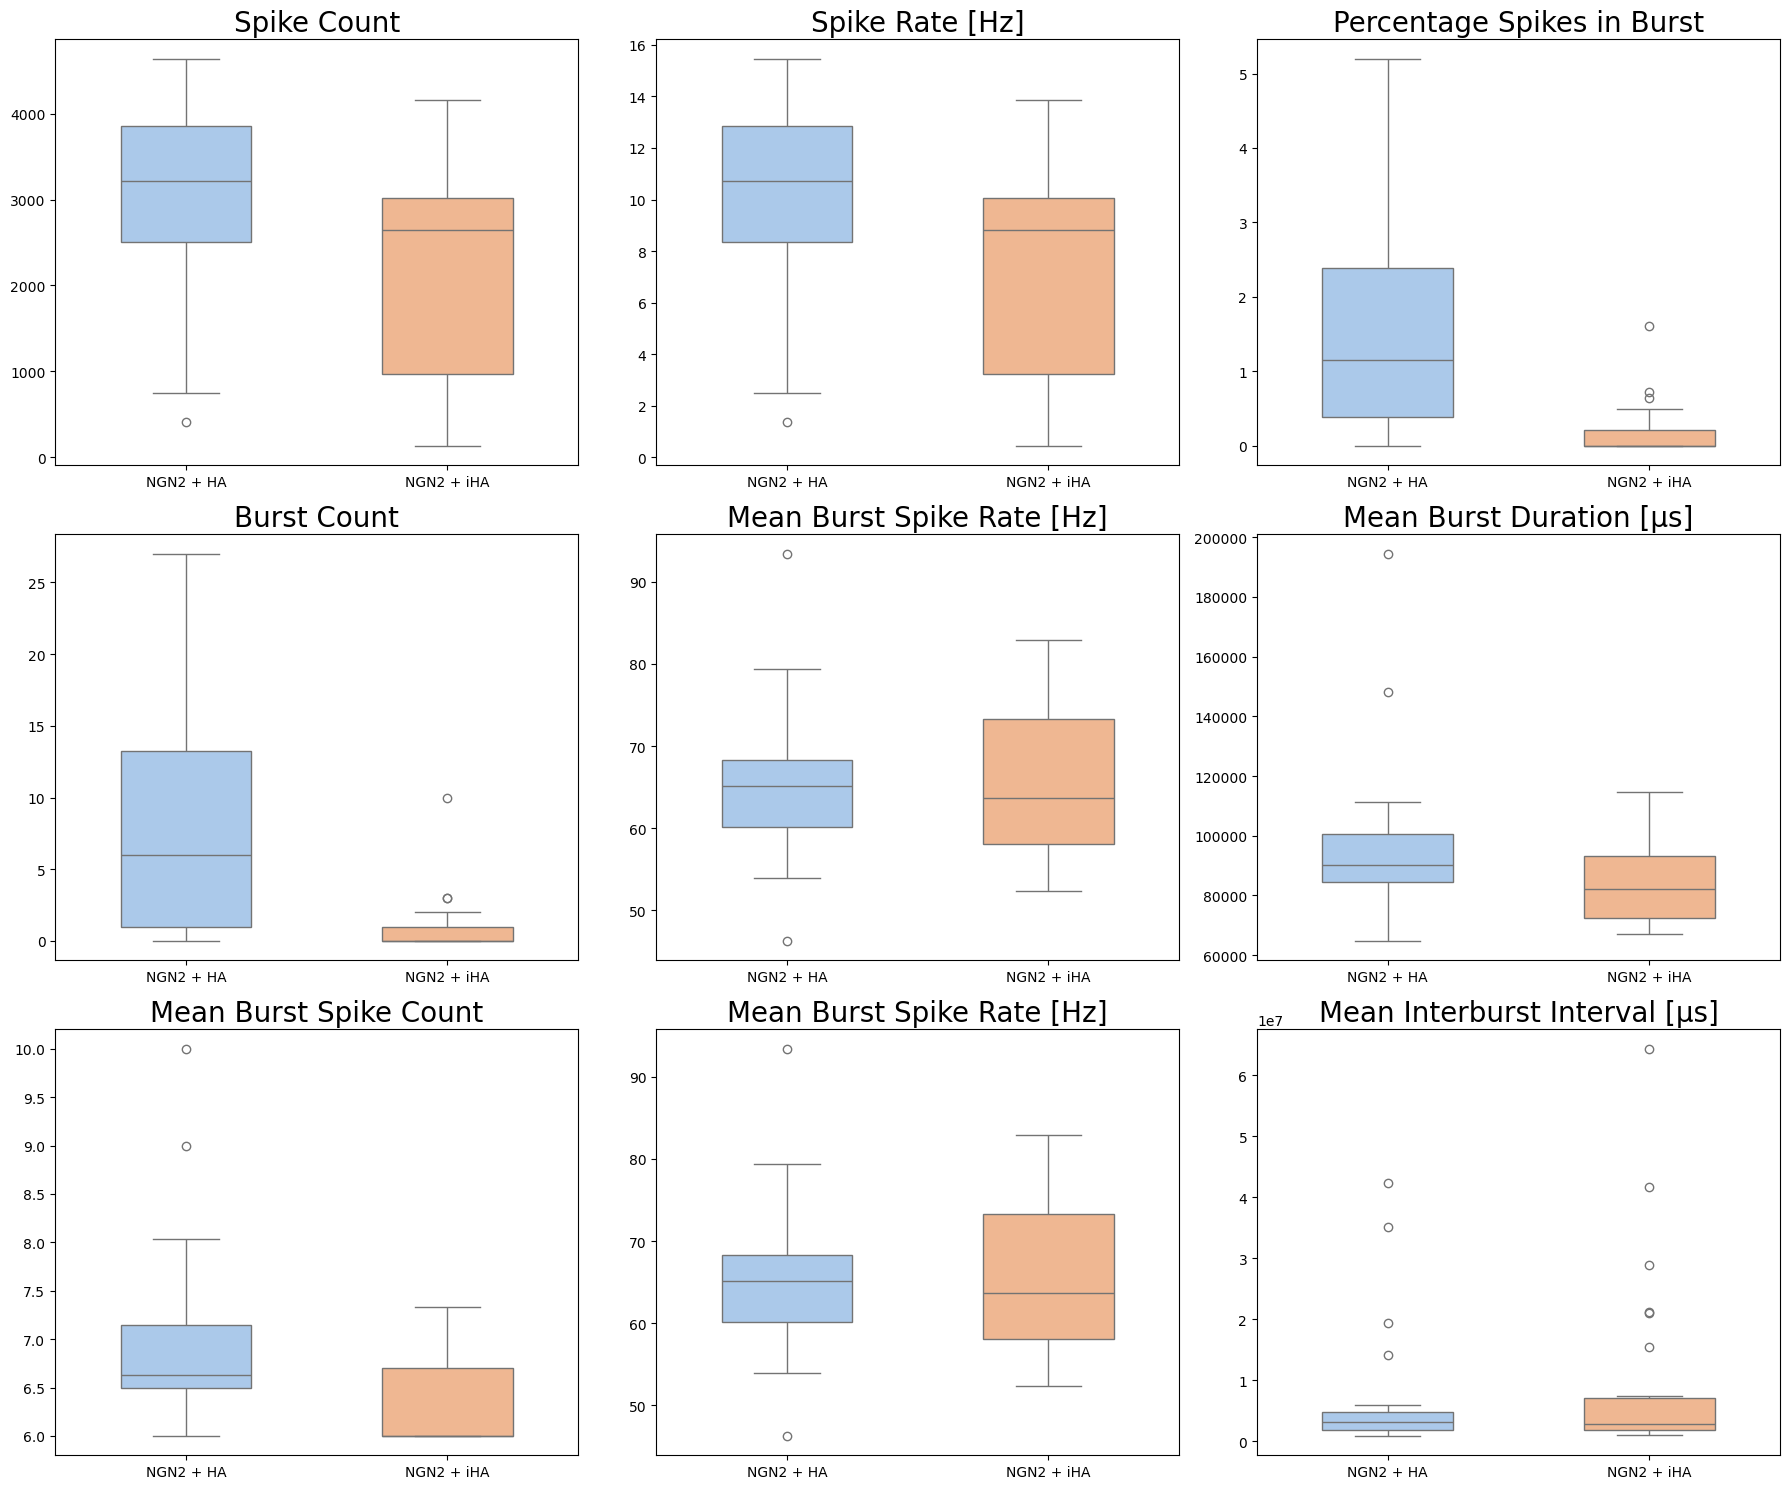

In [10]:
columns_to_plot = ['Spike Count', 'Spike Rate [Hz]', 'Percentage Spikes in Burst',
                   'Burst Count','Mean Burst Spike Rate [Hz]', 'Mean Burst Duration [µs]', 
                   'Mean Burst Spike Count', 'Mean Burst Spike Rate [Hz]', 
                   'Mean Interburst Interval [µs]']
n_rows = 3
n_cols = 3  

plt.figure(figsize=(6 * n_cols, 5 * n_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.boxplot(x='Compound ID', y=column,hue='Compound ID', data=data[data['Compound ID'].isin(['NGN2 + HA', 'NGN2 + iHA'])],
                palette='pastel',width=0.5)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(column,size=20)
    

plt.tight_layout() 
plt.show()
